In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [3]:
X=dataset.iloc[:,[2,3]].values

In [4]:
y=dataset.iloc[:,4].values

In [5]:
from sklearn.cross_validation import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc=StandardScaler()

In [10]:
X_train=sc.fit_transform(X_train)

In [12]:
X_test=sc.fit_transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
classifier=RandomForestClassifier(n_estimators=10,random_state=0,criterion='entropy')

In [48]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [49]:
y_pred=classifier.predict(X_test)

In [50]:
classifier.score(X_test,y_test)

0.90000000000000002

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm=confusion_matrix(y_test,y_pred)

In [53]:
cm

array([[63,  5],
       [ 5, 27]], dtype=int64)

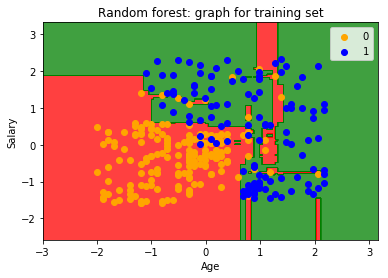

In [54]:
#visualization:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('Random forest: graph for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

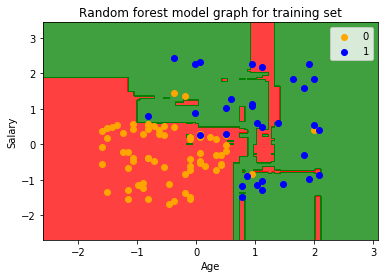

In [55]:
#for testing set
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('Random forest model graph for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
